In [1]:
# ========== [1] Kaggle Dataset Setup ==========
# Run this block only once (Google Colab specific)
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

The syntax of the command is incorrect.
cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '~/.kaggle/kaggle.json': No such file or directory


In [2]:
!kaggle datasets download vjchoudhary7/customer-segmentation-tutorial-in-python

'kaggle' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
!unzip customer-segmentation-tutorial-in-python.zip

unzip:  cannot find or open customer-segmentation-tutorial-in-python.zip, customer-segmentation-tutorial-in-python.zip.zip or customer-segmentation-tutorial-in-python.zip.ZIP.


In [4]:
# ========== [2] Import Required Libraries ==========
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

In [5]:
# For cleaner plots
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [6]:
# ========== [3] Load and Preprocess Data ==========
df = pd.read_csv("Mall_Customers.csv")

# Rename columns for simplicity
df.rename(columns={
    'CustomerID': 'id',
    'Gender': 'gender',
    'Age': 'age',
    'Annual Income (k$)': 'income',
    'Spending Score (1-100)': 'score'
}, inplace=True)

In [7]:
# Basic inspection
print("Dataset Shape:", df.shape)
print("Missing Values:\n", df.isnull().sum())
print("Duplicate Rows:", df.duplicated().sum())

Dataset Shape: (200, 5)
Missing Values:
 id        0
gender    0
age       0
income    0
score     0
dtype: int64
Duplicate Rows: 0


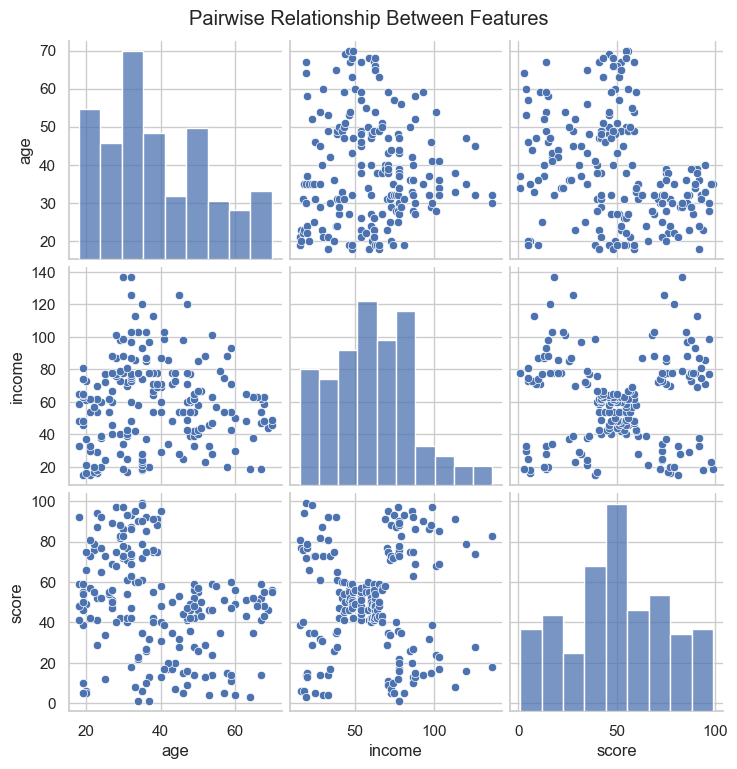

In [8]:
# ========== [4] Data Visualization ==========
# Pairwise plot to understand relationships
sns.pairplot(df[['age', 'income', 'score']])
plt.suptitle("Pairwise Relationship Between Features", y=1.02)
plt.show()

In [9]:
# ========== [5] Determine Optimal Clusters (Elbow Method) ==========
wcss = []
X = df[['income', 'score']]

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)


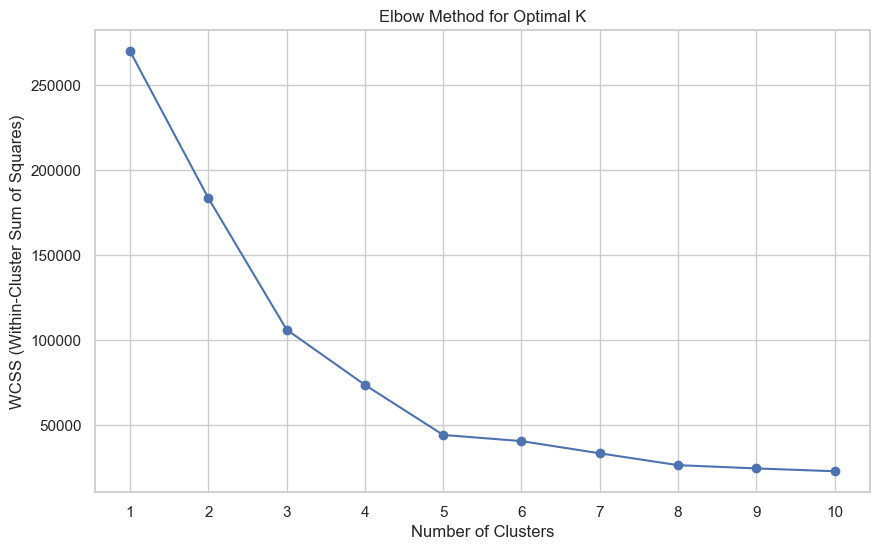

In [10]:
# Plot Elbow Curve
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

In [11]:
# ========== [6] Apply K-Means Clustering ==========
optimal_k = 5
kmeans_model = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_model.fit(X)

,n_clusters,5
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [12]:
# Assign labels to original data
df['cluster'] = kmeans_model.labels_

In [13]:
# Cluster centers
centroids = kmeans_model.cluster_centers_
print("Cluster Centers:\n", centroids)


Cluster Centers:
 [[55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [25.72727273 79.36363636]
 [88.2        17.11428571]
 [26.30434783 20.91304348]]


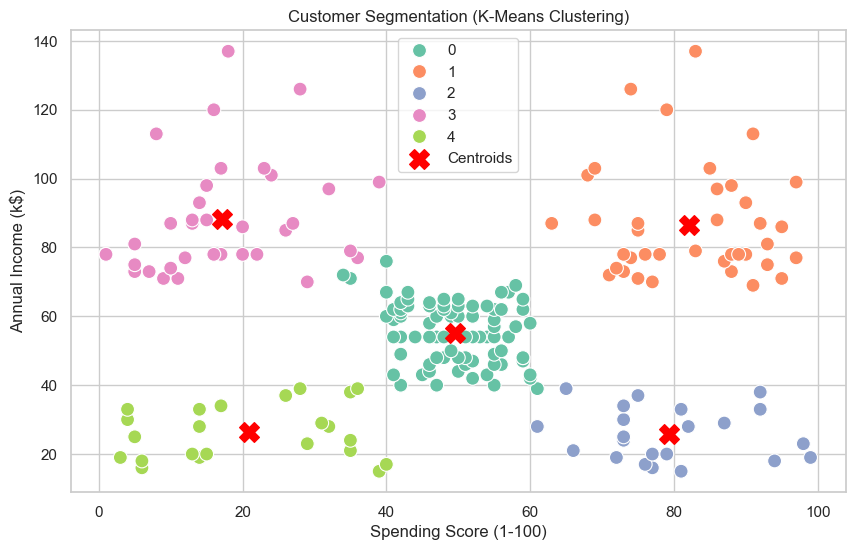

In [14]:
# ========== [7] Cluster Visualization ==========
# Scatter plot of clusters
sns.scatterplot(data=df, x='score', y='income', hue='cluster', palette='Set2', s=100)
plt.scatter(centroids[:, 1], centroids[:, 0], c='red', s=200, label='Centroids', marker='X')
plt.title("Customer Segmentation (K-Means Clustering)")
plt.xlabel("Spending Score (1-100)")
plt.ylabel("Annual Income (k$)")
plt.legend()
plt.show()

In [15]:
# ========== [8] Cluster Distribution ==========
cluster_counts = df['cluster'].value_counts().sort_index()
print("Number of customers in each cluster:\n", cluster_counts)

Number of customers in each cluster:
 cluster
0    81
1    39
2    22
3    35
4    23
Name: count, dtype: int64


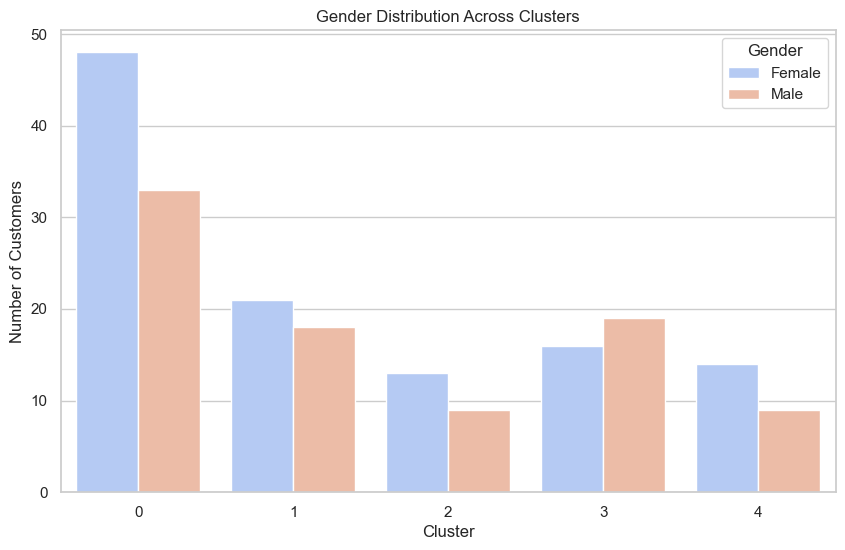

In [16]:
sns.countplot(data=df, x='cluster', hue='gender', palette='coolwarm')
plt.title("Gender Distribution Across Clusters")
plt.xlabel("Cluster")
plt.ylabel("Number of Customers")
plt.legend(title="Gender")
plt.show()

In [17]:
df.to_csv("clustered_customers.csv", index=False)

In [18]:
import joblib
joblib.dump(kmeans_model, "kmeans_model.pkl")

['kmeans_model.pkl']